In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np
from joblib import dump
import pickle
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
# Estadistica
from scipy.stats import norm, shapiro
# Modelos
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from xgboost import XGBClassifier, XGBRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, \
roc_curve, roc_auc_score, ConfusionMatrixDisplay, multilabel_confusion_matrix, balanced_accuracy_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [2]:
df1 = pd.read_csv('../data/raw/used_cars.csv').drop(columns='Unnamed: 0')
df1.columns = df1.columns.str.lower()

In [3]:
df1

,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5842,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
5843,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
5844,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
5845,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5847 entries, 0 to 5846
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               5847 non-null   object 
 1   location           5847 non-null   object 
 2   year               5847 non-null   int64  
 3   kilometers_driven  5847 non-null   int64  
 4   fuel_type          5847 non-null   object 
 5   transmission       5847 non-null   object 
 6   owner_type         5847 non-null   object 
 7   mileage            5845 non-null   object 
 8   engine             5811 non-null   object 
 9   power              5811 non-null   object 
 10  seats              5809 non-null   float64
 11  new_price          815 non-null    object 
 12  price              5847 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 594.0+ KB


In [5]:
df1.describe(include='all')

,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price
count,5847,5847,5847.000000,5.847000e+03,5847,5847,5847,5845,5811,5811,5809.000000,815,5847.000000
unique,1804,11,NaN,NaN,3,2,4,419,140,361,NaN,534,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,NaN,95.13 Lakh,NaN
freq,49,762,NaN,NaN,3161,4135,4811,172,602,235,NaN,6,NaN
mean,NaN,NaN,2013.448435,5.841013e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.286452,NaN,9.653742
std,NaN,NaN,3.194949,9.237971e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.806668,NaN,11.275966
min,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,0.440000
25%,NaN,NaN,2012.000000,3.346750e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,3.550000
50%,NaN,NaN,2014.000000,5.257600e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,5.750000
75%,NaN,NaN,2016.000000,7.249050e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,10.250000


In [6]:
df1.isna().sum()

name                    0
location                0
year                    0
kilometers_driven       0
fuel_type               0
transmission            0
owner_type              0
mileage                 2
engine                 36
power                  36
seats                  38
new_price            5032
price                   0
dtype: int64

In [7]:
na_ratio = ((df1.isnull().sum() / len(df1))*100).sort_values(ascending = False)
na_ratio

new_price            86.061228
seats                 0.649906
engine                0.615700
power                 0.615700
mileage               0.034206
name                  0.000000
location              0.000000
year                  0.000000
kilometers_driven     0.000000
fuel_type             0.000000
transmission          0.000000
owner_type            0.000000
price                 0.000000
dtype: float64

In [8]:
import sys
sys.path.append('..')
from utils.funcs import cardinalidad

In [9]:
cardinalidad(df1)

,Total de únicos,Cardinalidad (%),Tipo de dato
Columna,,,
name,1804,30.853429,categorical
location,11,0.188131,categorical
year,22,0.376261,numerical
kilometers_driven,3019,51.633316,numerical
fuel_type,3,0.051308,categorical
transmission,2,0.034206,boolean
owner_type,4,0.068411,categorical
mileage,419,7.166068,categorical
engine,140,2.394390,categorical


In [10]:
selected = df1[['location', 'fuel_type', 'transmission', 'owner_type', 'seats']]
for i in selected.columns:
    uniquevalues = df1[i].unique()
    print(f"Valores unicos en ' {i}': {uniquevalues}")

Valores unicos en ' location': ['Pune' 'Chennai' 'Coimbatore' 'Jaipur' 'Mumbai' 'Kochi' 'Kolkata' 'Delhi'
 'Bangalore' 'Hyderabad' 'Ahmedabad']
Valores unicos en ' fuel_type': ['Diesel' 'Petrol' 'Electric']
Valores unicos en ' transmission': ['Manual' 'Automatic']
Valores unicos en ' owner_type': ['First' 'Second' 'Fourth & Above' 'Third']
Valores unicos en ' seats': [ 5.  7.  8.  4.  6.  2. nan 10.  9.]


Crear columna marca y modelo

In [11]:
df1['brand'] = df1['name'].str.split().str[0]
df1['model'] = df1['name'].str.split().str[1]

Eliminiar columna 'new_price', falta el 86% de los datos, no es razonable imputarlo.

In [12]:
df1.drop(columns='new_price', inplace=True)

Quitar str de las columnas mileage, engine y power y pasar a float.

In [13]:
df1['mileage'] = df1['mileage'].str.replace('kmpl', ' ').str.replace('km/kg', ' ')
df1['engine'] = df1['engine'].str.replace('CC', ' ')
df1['power'] = df1['power'].str.replace('bhp', ' ')
df1['mileage'] = pd.to_numeric(df1['mileage'])
df1['engine'] = pd.to_numeric(df1['engine'])
df1['power'] = pd.to_numeric(df1['power'])

Mapeo columnas fuel_type, transmission y owner_type pasa pasar a numerico.

In [14]:
df1['fuel_type'] = pd.to_numeric(df1['fuel_type'].map({'Diesel' : 0, 'Petrol': 1, 'Electric': 2}))
df1['transmission'] = pd.to_numeric(df1['transmission'].map({'Automatic' : 0, 'Manual': 1}))
df1['owner_type'] = pd.to_numeric(df1['owner_type'].map({'Fourth & Above' : 0, 'Third': 1, 'Second': 2, 'First': 3}))

Pasar la columna price a euros.

In [15]:
cambio = 89.15
df1['price'] = (df1['price'] * 100000) / cambio

Imputar mediana en los Nans de las columnas engine, power y seats e imputar media en los Nans de mileage

In [16]:
engine_por_model = df1.groupby('model')['engine'].median()
df1['engine'] = df1.apply(lambda row: engine_por_model[row['model']] if pd.isna(row['engine']) else row['engine'], axis=1)

power_por_model = df1.groupby('model')['power'].median()
df1['power'] = df1.apply(lambda row: power_por_model[row['model']] if pd.isna(row['power']) else row['power'], axis=1)

seats_por_model = df1.groupby('model')['seats'].median()
df1['seats'] = df1.apply(lambda row: seats_por_model[row['model']] if pd.isna(row['seats']) else row['seats'], axis=1)

mileage_por_model = df1.groupby('model')['mileage'].mean()
df1['mileage'] = df1.apply(lambda row: seats_por_model[row['model']] if pd.isna(row['mileage']) else row['mileage'], axis=1)

Eliminar columnas innecesarias

In [17]:
df1.drop(columns=['location', 'name', 'brand', 'model'], inplace=True)

Quitar outliers en kilometers_driven

In [18]:
outliers = df1[df1['kilometers_driven'] > 150000]
total_datos = len(df1)
datos_por_encima_150k = len(outliers)
porcentaje_por_encima_150k = (datos_por_encima_150k / total_datos) * 100
print(f"Number of cars over 150,000 kms: {datos_por_encima_150k}")
print(f"Percentage of cars over 150,000 kms: {porcentaje_por_encima_150k:.2f}%")

df1 = df1[df1['kilometers_driven'] <= 150000]

Number of cars over 150,000 kms: 107
Percentage of cars over 150,000 kms: 1.83%


In [19]:
df1

,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,price
0,2015,41000,0,1,3,19.67,1582.0,126.20,5.0,14021.312395
1,2011,46000,1,1,3,13.00,1199.0,88.70,5.0,5047.672462
2,2012,87000,0,1,3,20.77,1248.0,88.76,7.0,6730.229950
3,2013,40670,0,0,2,15.20,1968.0,140.80,5.0,19899.046551
4,2013,86999,0,1,3,23.08,1461.0,63.10,5.0,3925.967471
...,...,...,...,...,...,...,...,...,...,...
5842,2014,27365,0,1,3,28.40,1248.0,74.00,5.0,5328.098710
5843,2015,100000,0,1,3,24.40,1120.0,71.00,5.0,4486.819966
5844,2012,55000,0,1,2,14.00,2498.0,112.00,8.0,3252.944476
5845,2013,46000,1,1,3,18.90,998.0,67.10,5.0,2972.518228


In [20]:
df1.to_csv('../../src/data/process/cars_num.csv', index=False)

## EDA

In [2]:
df = pd.read_csv('../data/process/cars_num.csv')

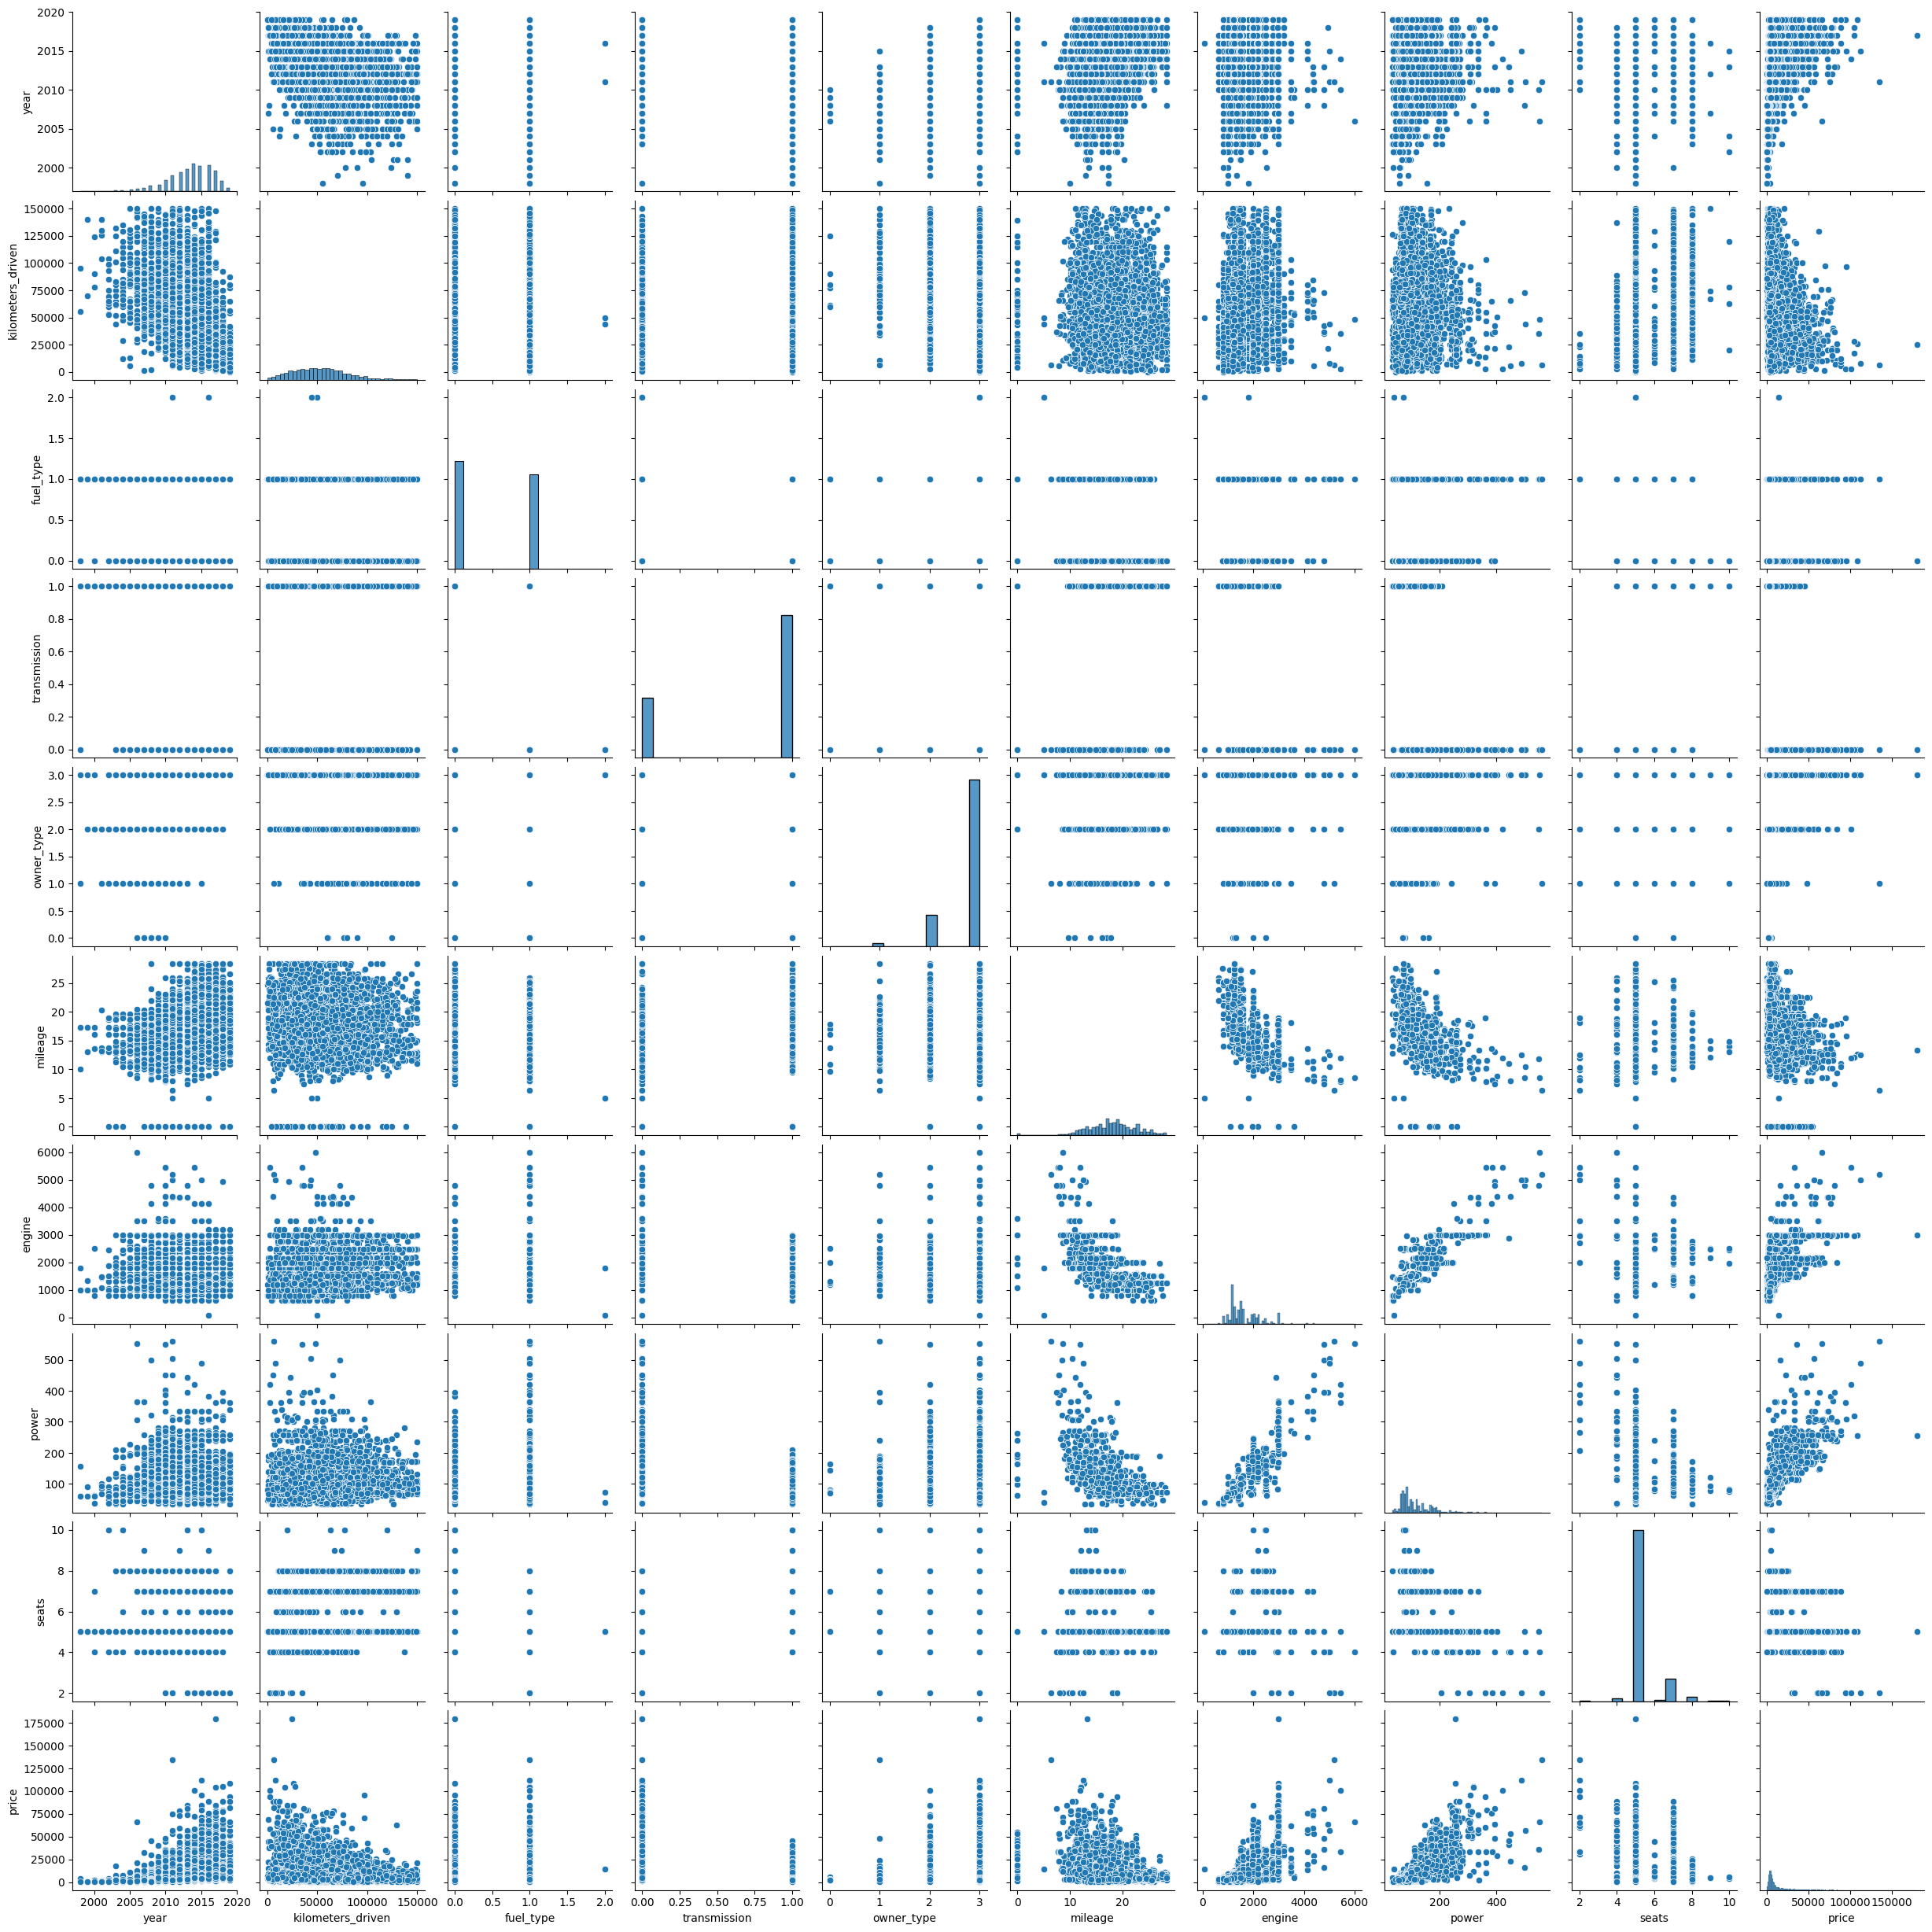

In [22]:
sns.pairplot(df);

<Axes: >

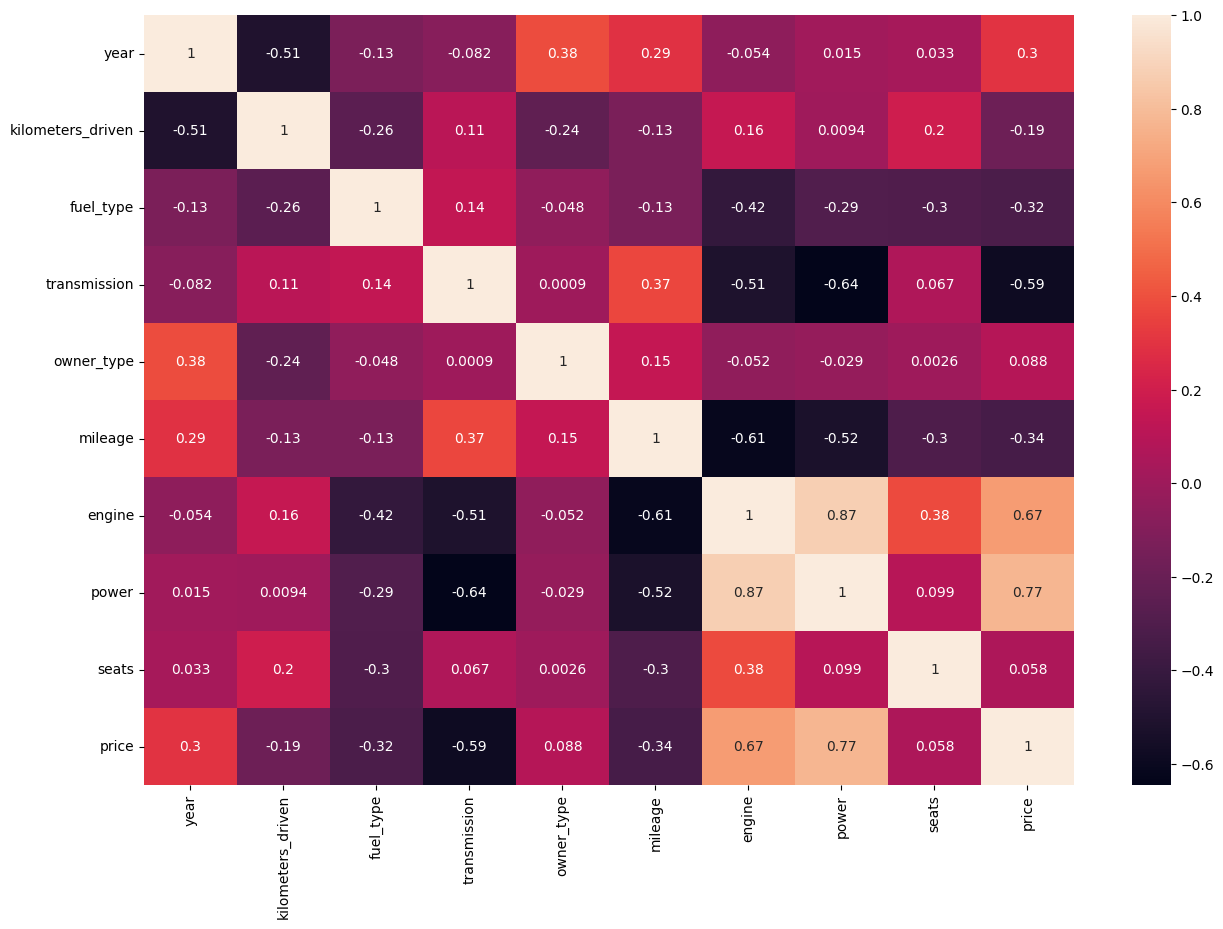

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)

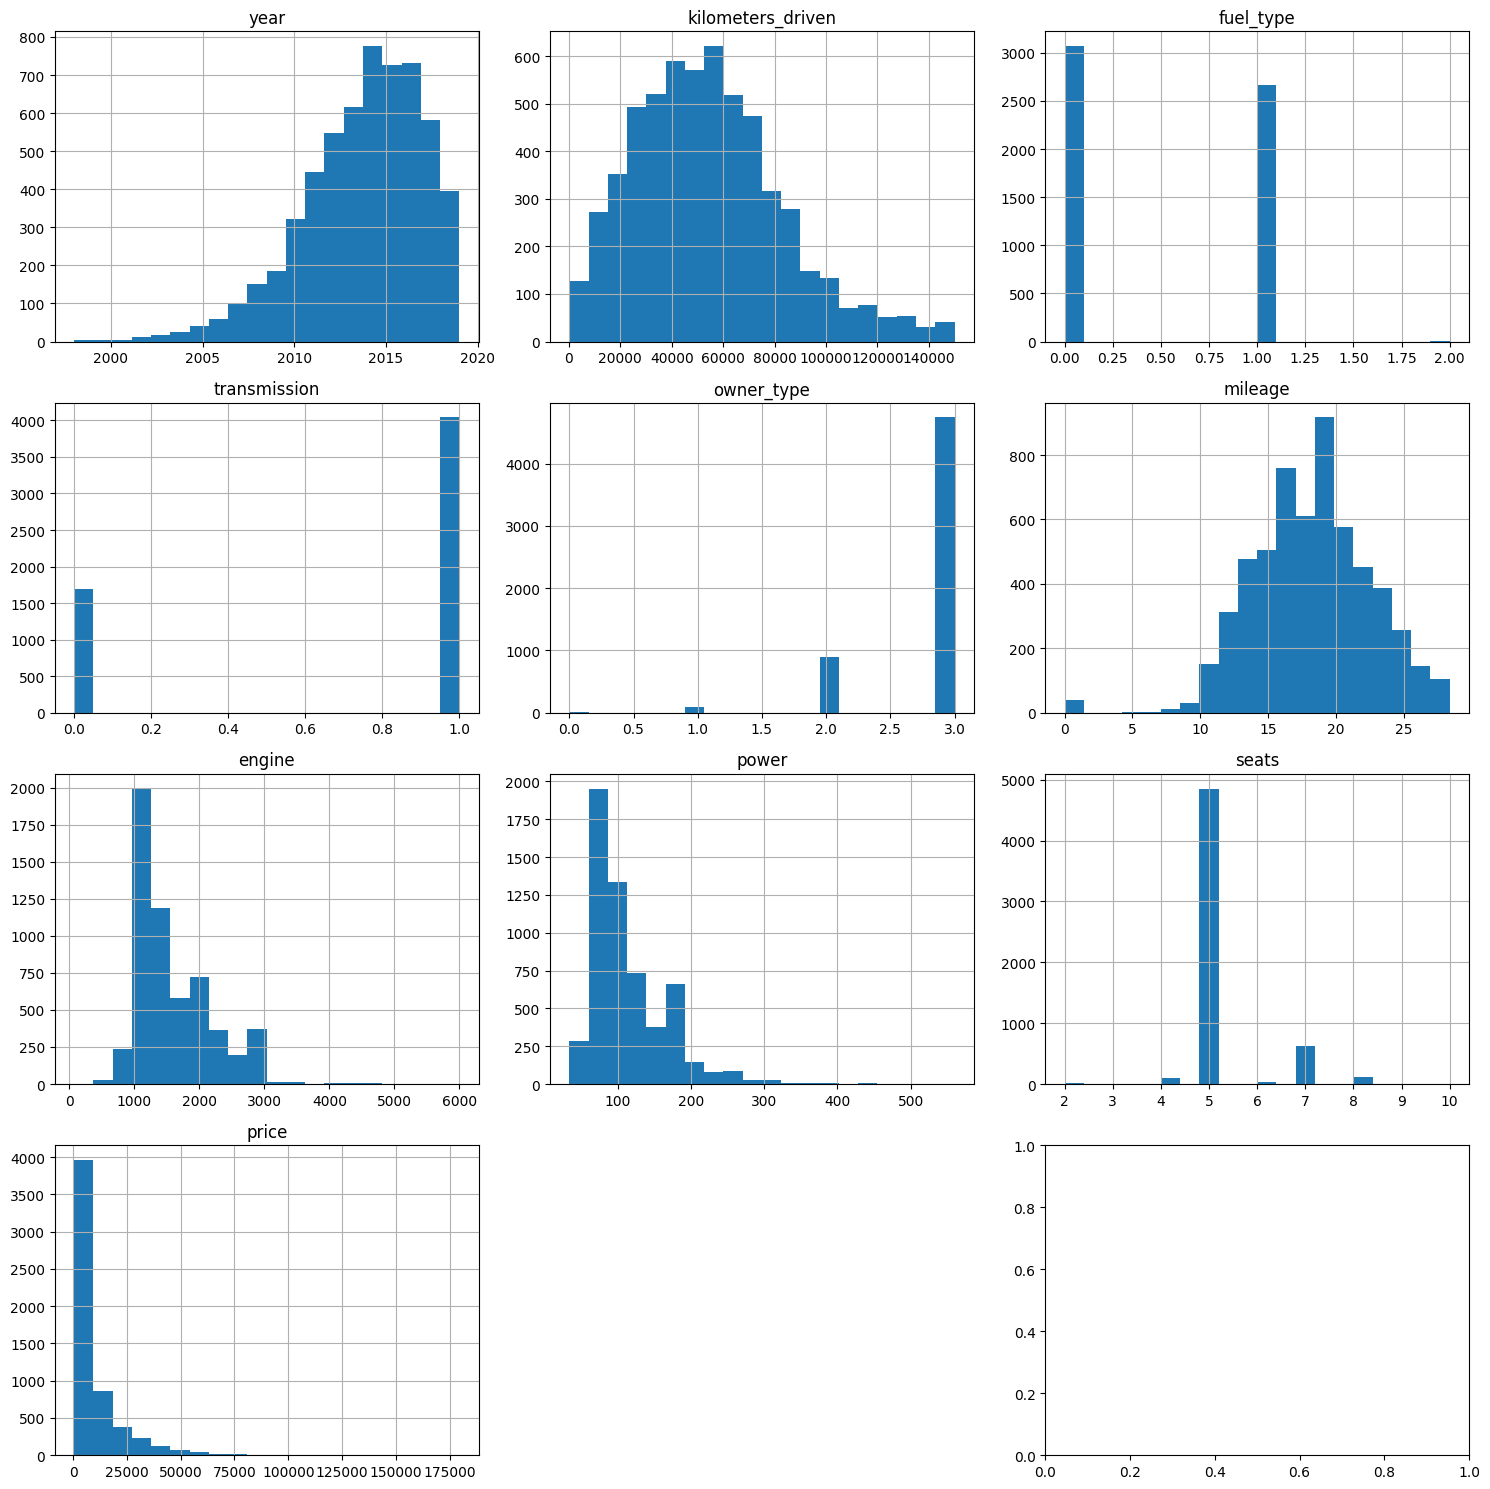

In [24]:
fig, axs = plt.subplots(4, 3, figsize=(15, 15))
fig.delaxes(axs.flatten()[-2])
df.hist(bins=20, ax=axs.flatten()[:-2])
plt.tight_layout()
plt.show()

## División de datos

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['price']), df['price'], test_size=0.2, random_state=73)

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4592, 9)
(1148, 9)
(4592,)
(1148,)


## Escalado y dummies

In [5]:
esc = MinMaxScaler()
X_train_mm = esc.fit_transform(X_train)
X_test_mm = esc.transform(X_test)


## Baselines

In [6]:
modelos = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "CatBoost": CatBoostRegressor(verbose=False)
    
}

# Define las métricas a usar
metricas = ['neg_mean_absolute_error']

resultados_dict = {}

for nombre_modelo, modelo in modelos.items():
    cv_resultados = cross_validate(modelo, X_train_mm, y_train, cv=5, scoring=metricas)
    
    for metrica in metricas:
        clave = f"{nombre_modelo}_{metrica}"
        resultados_dict[clave] = cv_resultados[f"test_{metrica}"].mean()

# Convertir el diccionario de resultados en DataFrame

resultados_df = pd.DataFrame([resultados_dict])

resultados_df.T

KeyboardInterrupt: 

## Entrenar

In [7]:
catb = CatBoostRegressor(verbose=False)
catb.fit(X_train_mm, y_train)

## Predicción

In [8]:
y_pred = catb.predict(X_test_mm)
y_pred

array([ 6009.46247858, 14076.41937368,  3545.84514307, ...,
        9336.88078896,  6085.45154695,  5900.97069499])

## Validación del modelo

In [9]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

MAE: 1913.0006296258896
MSE: 22418701.93593514
RMSE: 4734.839166849824
MAPE: 0.22420287658809515


## Optimización del modelo

In [18]:
# Prueba nueva
param_grid = {
    'depth': [8],
    'learning_rate': [0.15],
    'iterations': [150],
    'l2_leaf_reg': [1],
    'bagging_temperature': [0.0],
    'random_strength': [1],
    'border_count': [128],
    'subsample': [1.0]
}
catb = CatBoostRegressor(verbose=False)

grid_search = GridSearchCV(estimator=catb, param_grid=param_grid, cv=3, scoring='r2')

grid_search.fit(X_train_mm, y_train)

best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_

In [33]:
# param_grid = {
#     'depth': [4, 6, 8, 10],
#     'learning_rate': [0.01, 0.05, 0.1, 0.15],
#     'iterations': [30, 50, 100, 150]
# }
# catb = CatBoostRegressor(verbose=False)

# grid_search = GridSearchCV(estimator=catb, param_grid=param_grid, cv=3, scoring='r2')

# grid_search.fit(X_train_mm, y_train)

# best_parameters = grid_search.best_params_
# best_model = grid_search.best_estimator_

In [19]:
# Prueba nueva
print(f"Best score (r2): {grid_search.best_score_}")
print(f"Best parameters: {best_parameters}")
print(f'Best model: {best_model}')

Best score (r2): 0.8908013715945312
Best parameters: {'bagging_temperature': 0.0, 'border_count': 128, 'depth': 8, 'iterations': 150, 'l2_leaf_reg': 1, 'learning_rate': 0.15, 'random_strength': 1, 'subsample': 1.0}
Best model: <catboost.core.CatBoostRegressor object at 0x0000019468A20F50>


In [34]:
# print(f"Best score (r2): {grid_search.best_score_}")
# print(f"Best parameters: {best_parameters}")
# print(f'Best model: {best_model}')

Best score (r2): 0.8971580487358968
Best parameters: {'depth': 8, 'iterations': 150, 'learning_rate': 0.15}
Best model: <catboost.core.CatBoostRegressor object at 0x0000026BF276FD50>


In [20]:
# Prueba nueva
mae = mean_absolute_error(y_test, grid_search.predict(X_test_mm))
mse = mean_squared_error(y_test, grid_search.predict(X_test_mm))
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

MAE: 1913.8075155348104
MSE: 20378414.15767499
RMSE: 4514.245690885133
MAPE: 0.22632670533041138


In [35]:
mae = mean_absolute_error(y_test, grid_search.predict(X_test_mm))
mse = mean_squared_error(y_test, grid_search.predict(X_test_mm))
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

MAE: 1992.636190537488
MSE: 20707802.562663987
RMSE: 4550.582661886716
MAPE: 0.22420287658809515


In [21]:
y_pred = best_model.predict(X_test_mm)

In [22]:
y_pred

array([ 6097.61956383, 10805.11054189,  3393.07934169, ...,
        9532.42461222,  5876.10961446,  5867.6851816 ])

In [44]:
dump(best_model, '../model/modelo_CB_entrenado.joblib')

['../model/modelo_CB_entrenado.joblib']

In [45]:
with open('../model/modelo_CB_entrenado.pkl', 'wb') as archivo:
    pickle.dump(best_model, archivo)